In [18]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [89]:
#Constants
Gna = 30
Gkdr = 15
Gkca = 15
Gkahp = 0.8
Gca = 10
Gl = 0.1
Gc = 2.1
Vna = 60
Vk = -75
Vca = 80
Vl = -60
p = 0.5
Ca = 0.21664282 
Cm = 1

Isapp = 0
Idapp = 2.5

In [90]:
#Alpha and Beta functions and Chi
"""
def H(X):
    if X < 0:
        return 0
    else: 
        return 1
"""
def alphaM(Vs):
    return (0.32*(-46.9 - Vs)/(np.exp((-46.9 - Vs)/4) - 1))

def betaM(Vs):
    return (0.28*(Vs + 19.9)/(np.exp((Vs + 19.9)/5) - 1))

def alphaN(Vs):
    return ((0.016*(-24.9 - Vs))/(np.exp((-24.9 - Vs)/5) - 1))

def betaN(Vs):
    return (0.25*np.exp(-1 - 0.025*Vs))

def alphaH(Vs):
    return (0.128*np.exp((-43-Vs)/18))

def betaH(Vs):
    return (4/(1 + np.exp((-20-Vs)/5)))

def alphaS(Vd):
    return (1.6/(1 + np.exp(-0.072*(Vd - 5))))

def betaS(Vd):
    return (0.02*(Vd + 8.9)/(np.exp((Vd + 8.9)/5) - 1))

#def alphaC(Vd):
    #return ((1 - H(Vd + 10)*np.exp((Vd + 50)/11 - (Vd + 53.5)/27)/18.975) + H(Vd + 10)*(2*np.exp((-53.5-Vd)/27)))

#def betaC(Vd):
    #return ((1 - H(Vd + 10))*(2*np.exp((-53.5 - Vd)/27) - alphaC(Vd)))

#def alphaQ(Ca):
    #return (min(0.00002*Ca,0.01))

#def betaQ(Ca):
    #return (0.001)

#def chi(Ca):
   # return (min(Ca/250,1))
    
def qinf(Ca):
    return ((0.7894 * np.exp(0.0002726*Ca)) - (0.7292 * np.exp(-0.01672*Ca)))

def tauq(Ca):
    return (657.9 * np.exp(-0.02023*Ca)) + (301.8 * np.exp(-0.002381*Ca))

def cinf(Vd):
    return ((1.0/(1.0 + np.exp((-10.1 - Vd)/0.1016)))**0.00925)

def tauc(Vd):
    return (3.627 * np.exp(0.03704*Vd))

def chi(Ca):
    return (1.073*np.sin(0.003453*Ca+0.08095) \
            + 0.08408*np.sin(0.01634*Ca-2.34)\
            + 0.01811*np.sin(0.0348*Ca-0.9918))

#RK

def dVdt(V, t):
    Vs, Vd, m, n, h, s, c, q, Ca = V
    
    #Equations for currents
    Ina = Gna * m**2 * h * (Vs - Vna) #Mi is minfinity
    Ikdr = Gkdr * n * (Vs - Vk)
    Ica = Gca * s**2 * (Vd - Vca)
    Ikca = Gkca * c * chi(Ca) * (Vd - Vk)
    Ikahp = Gkahp * q * (Vd - Vk)
    Isd = Gc * (Vs - Vd)
    Ids = -Isd
    Ileakd = Gl * (Vd - Vl)
    Ileaks = Gl * (Vs - Vl)

    dCadt = (-0.13*Ica - 0.075*Ca)
    dvsdt = (-Ileaks - Ina - Ikdr + Ids/p + Isapp/p)/Cm
    dvddt = (-Ileakd - Ica - Ikca - Ikahp + Isd/(1-p) + Idapp/(1-p))/Cm
    dmdt = (((alphaM(Vs)/(alphaM(Vs) + betaM(Vs))) - m)/(1/(alphaM(Vs) + betaM(Vs))))
    dndt = (((alphaN(Vs)/(alphaN(Vs) + betaN(Vs))) - n)/(1/(alphaN(Vs) + betaN(Vs))))
    dhdt = (((alphaH(Vs)/(alphaH(Vs) + betaH(Vs))) - h)/(1/(alphaH(Vs) + betaH(Vs))))
    dsdt = (((alphaS(Vd)/(alphaS(Vd) + betaS(Vd))) - s)/(1/(alphaS(Vd) + betaS(Vd))))
    #dcdt = (((alphaC(Vd)/(alphaC(Vd) + betaC(Vd))) - c)/(1/(alphaC(Vd) + betaC(Vd))))
    #dqdt = (((alphaQ(Ca)/(alphaQ(Ca) + betaQ(Ca))) - q)/(1/(alphaQ(Ca) + betaQ(Ca))))
    dqdt = (qinf(Ca) - q)/tauq(Ca)
    dcdt = (cinf(Vd) - c)/tauc(Vd)
    
    
    return dvsdt, dvddt, dmdt, dndt, dhdt, dsdt, dcdt, dqdt, dCadt

In [91]:
tmin, tmax, dt = 0, 1000, 0.01
T = np.arange(tmin,tmax,dt)

V0 = [-62.89223689, -62.98248752, 0.5, 0.00068604, 0.99806345, 0.01086703, 0.00809387, 0.0811213, 0.21664282] #Initital values need to be feeded
sol = odeint(dVdt, V0, T)

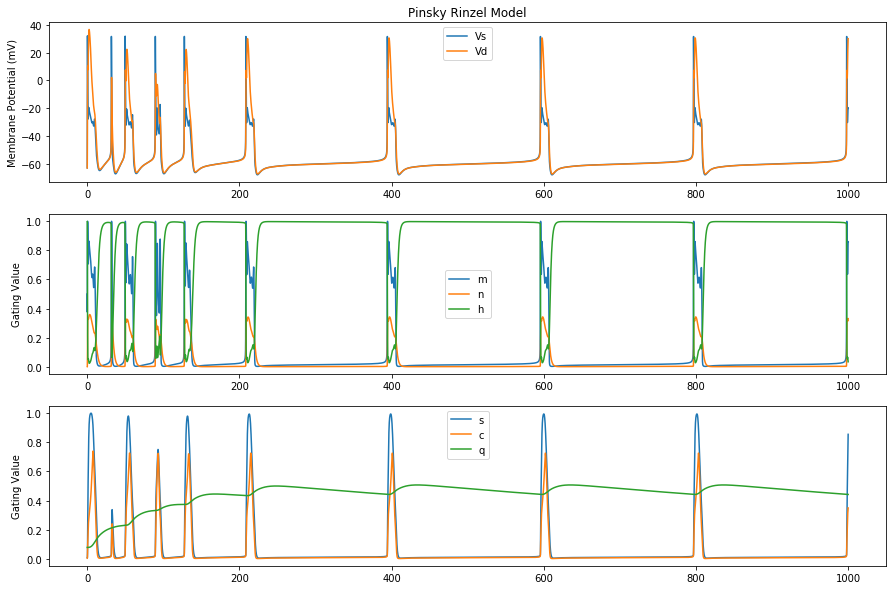

In [92]:
Vs, Vd, m, n, h, s, c, q, Ca = sol.T

plt.figure(figsize=(15, 10))

plt.subplot(3,1,1)
plt.title('Pinsky Rinzel Model')
plt.plot(T, Vs, label = 'Vs')
plt.plot(T, Vd, label = 'Vd')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(T, m, label='m')
plt.plot(T, n, label='n')
plt.plot(T, h, label='h')
plt.ylabel('Gating Value')
plt.legend()

plt.subplot(3,1,3)
plt.plot(T, s, label='s')
plt.plot(T, c, label='c')
plt.plot(T, q, label='q')
plt.ylabel('Gating Value')
plt.legend()

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in exp


[0.0602     0.08461175 0.10823505 0.13109586 0.15321925 0.17462948
 0.19535002 0.21540355 0.23481202 0.25359665 0.27177796 0.28937581
 0.30640938 0.32289726 0.33885738 0.35430711 0.36926325 0.38374204
 0.39775918 0.41132987 0.42446879 0.43719015 0.44950769 0.46143471
 0.47298405 0.48416813 0.49499899 0.50548824 0.51564713 0.52548653
 0.53501696 0.54424858 0.55319123 0.56185441 0.57024734 0.5783789
 0.58625771 0.59389207 0.60129003 0.60845939 0.61540766 0.62214212
 0.62866982 0.63499756 0.64113192 0.64707928 0.65284579 0.6584374
 0.66385988 0.6691188  0.67421954 0.67916731 0.68396716 0.68862395
 0.6931424  0.69752707 0.70178236 0.70591254 0.70992172 0.71381391
 0.71759294 0.72126256 0.72482637 0.72828785 0.73165038 0.73491722
 0.73809153 0.74117636 0.74417466 0.74708928 0.74992298 0.75267843
 0.75535822 0.75796484 0.76050071 0.76296815 0.76536943 0.76770673
 0.76998217 0.77219779 0.77435556 0.77645739 0.77850513 0.78050057
 0.78244544 0.7843414  0.78619008 0.78799304 0.78975179 0.791467

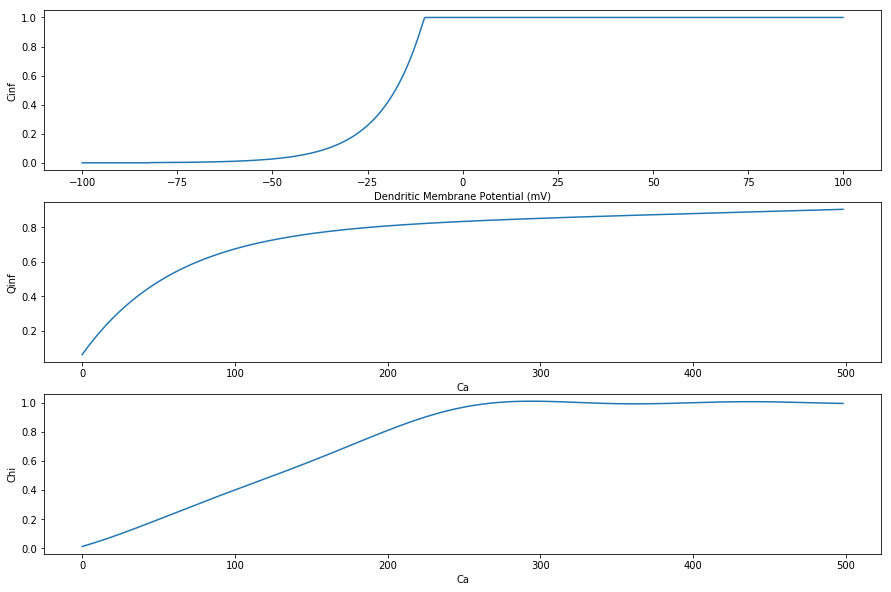

In [93]:
Vdmin, Vdmax, dVd = -100, 100, 0.1
Vd = np.arange(Vdmin,Vdmax,dVd)
Cmin, Cmax, dC = 0, 500, 2
C = np.arange(Cmin, Cmax, dC)
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
plt.plot(Vd, cinf(Vd))
plt.ylabel('Cinf')
plt.xlabel('Dendritic Membrane Potential (mV)')
plt.legend

plt.subplot(3,1,2)
plt.plot(C, qinf(C))
plt.ylabel('Qinf')
plt.xlabel('Ca')
plt.legend

plt.subplot(3,1,3)
plt.plot(C, chi(C))
plt.ylabel('Chi')
plt.xlabel('Ca')
plt.legend

print qinf(C), cinf(Vd), chi(C)

plt.show()